# Multi-class Brain Classifier

This notebook builds an image classifier using Tensorflow 2.0 and Tensorflow Hub.

<img src='https://www.igb.illinois.edu/sites/default/files/upload/core/Images/ttf1R_PvalbG_001-small.jpg'>

Image Source: <a href='https://www.igb.illinois.edu/sites/default/files/upload/core/Images/ttf1R_PvalbG_001-small.jpg'>Link</a>


## 1. Problem ✅
> Identifying the type of neurodegeneration from multiple images of the brain(specifically a white matter staining first)

> Neurodegeneration is a critical component of aging so being able to predict the signatures of neuronal damage by using white matter structural changes as biomarkers would help us inform of a treatment window to prevent further cognitive / memory loss.

Future:
* Look at classifying images from different readouts of neurodegeneration, aka inflammation and blood brain barrier permeability

## 2. Data ✅
The data we're using is from current company's internal database of brain histological images.
> The images are sectioned coronally. Please refer to this <a href='https://mouse.brain-map.org/experiment/thumbnails/100048576?image_type=atlas'>link</a> for more information about Coronal brain secions!

> Although most of the images are similar to each other in terms of hipppocampal area, it would be good to add a mixture of other brain regions to improve the model accuracy.

## 3. Evaluation ✅

Seeing how accurate our model is in identifying regions of high structural change between images.

> **Note** This is still a work in progress. The model is still training!

## 4. Features ✅

* Currently I am working with 5 different models of neurodegeneration with around 20-30 images per model (so far!)

* Custom images were images found on the internet with similar white matter staining but with different models of neurodegeneration.

## Table of Contents
1. [Data Preparation](#1)
2. [Data Processing](#2)
3. [Visualizations](#3)
4. [Modeling](#4)
5. [Making and Evaluating Predictions using Trained Model](#5)
6. [Saving and Loading a Trained Model](#6)

In [ ]:
# import Tensorflow into Colab
import tensorflow as tf
print('TF Version:', tf.__version__)

# importing Tensorflow Hub
import tensorflow_hub as hub
print('Tensorflow hub:', hub.__version__)

# check for GPU availability
print('GPU',
      'available' if tf.config.list_physical_devices('GPU') else 'not available')

TF Version: 2.13.0
Tensorflow hub: 0.14.0
GPU available


# 1. Data Preparation <a name='1'>
## Getting our Data ready (Turning it into Tensors)

With all ML models, our data has to be in numerical format.
* Turning our images into Tensors (numerical representations)

Lets start by accessing our data and checking the `labels.csv` which contains the labels for each image

In [ ]:
# Importing the relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
import os

In [ ]:
# Checkout the labels of the data
labels_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Brain Detection/labels.csv', delimiter = '\t')
labels_csv.describe()


,Index,ID
count,127.000000,127.000000
mean,64.000000,43.401575
std,36.805797,17.748803
min,1.000000,15.000000
25%,32.500000,23.000000
50%,64.000000,41.000000
75%,95.500000,62.000000
max,127.000000,67.000000


In [ ]:
labels_csv.head(10)

,Index,ID,Target,FileName
0,1,35,middle,image_1
1,2,35,middle,image_2
2,3,36,middle,image_3
3,4,36,middle,image_4
4,5,36,middle,image_5
5,6,36,middle,image_6
6,7,36,middle,image_7
7,8,36,middle,image_8
8,9,37,middle,image_9
9,10,37,middle,image_10


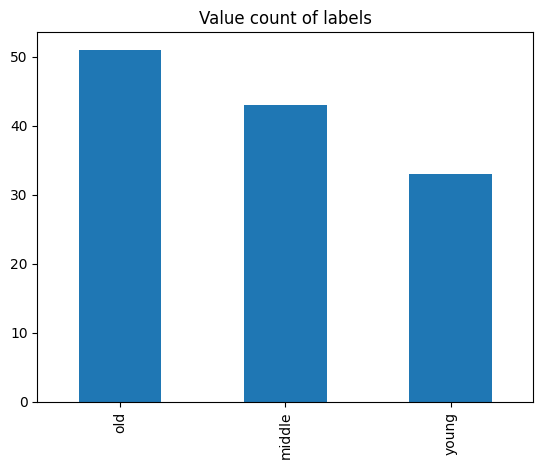

In [ ]:
# storing the label columns as a list
label_columns = list(labels_csv.columns)

labels_csv['Target'].value_counts().plot(kind = 'bar')
plt.title('Value count of labels');

### Getting images and their labels

Lets get a list of all image file pathnames

In [ ]:
# Create pathnames from image ID's
filenames = ['/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/' + fname + '.jpeg' for fname in labels_csv['FileName']]
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_1.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_2.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_3.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_4.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_5.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_6.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_7.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_8.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_9.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/image_10.jpeg']

In [ ]:
# check whether number of filenames matches number of actual image files
if len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/')) == len(filenames):
  print('Filenames match actual amount of files')
else:
  print('Filenames do not match actual amount of files')

Filenames match actual amount of files


In [ ]:
len(os.listdir('/content/drive/MyDrive/Colab Notebooks/Brain Detection/Images/')), len(filenames)

(127, 127)

Since we got our training image filepaths in a list, let's prepare our labels.

In [ ]:
labels = labels_csv['Target']
labels = np.array(labels)
labels

In [ ]:
unique_targets = np.unique(labels)
unique_targets[:10]

array(['middle', 'old', 'young'], dtype=object)

In [ ]:
len(unique_targets)

3

Here we will be turning a single label into an array of booleans (as a test), and after we will turn every label into a boolean array)

In [ ]:
# 1. turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_targets

middle


array([ True, False, False])

In [ ]:
# turn every label into a boolean array
boolean_labels = [label == unique_targets for label in labels]
boolean_labels

[array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([

In [ ]:
# Example: turning boolean array into integers
print(labels[0]) # original label
print(np.where(unique_targets == labels[0])) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

middle
(array([0]),)
0
[1 0 0]


## Creating our Own Validation Set

In [ ]:
# Setup X and y variables
X = filenames
y = boolean_labels

We're going to experiment with ~ 100 images first and inrease afterwards

In [ ]:
# Set number of images to use for experimenting
NUM_IMAGES = 100 #@param {type:'slider', min:1, max:100, step: 1}

In [ ]:
# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# split them into training and val of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size = 0.2,
                                                  random_state = 42)

len(X_train), len(y_train), len(X_val), len(y_val)

(80, 80, 20, 20)

# 2. Data Processing <a name='2'>
## Preprocessing Images (turning images into Tensors)

To preprocess our images into Tensors we’re going to write a function that:
1. Take an image filepath as input
2. Use TensorFlow to read the file and save it to a variable `image`
3. Turn our image (A jpg) into Tensors
4. Resize our `image` to be a shape of (224, 224)

5. Return our modified `image`


In [ ]:
# convert an image to a numpy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(8906, 7437)

In [ ]:
tf.constant(image)

<tf.Tensor: shape=(8906, 7437), dtype=uint8, numpy=
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)>

In [ ]:
# Define the image size:
IMG_SIZE = 224

# Create a function for preprocessing images:
def process_image(image_path):
  '''
  Takes an image file path and turns the image into a tensor
  '''
  # read in an image file
  image = tf.io.read_file(image_path)
  # turn the jpeg image into numerical tensor with 3 color channels (R, G , B)
  image = tf.image.decode_jpeg(image, channels=3)
  # Covert the color channel values from 0-255 to 0-1 values  (normalizing the image)
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired value (224, 224)
  image = tf.image.resize(image, size = [IMG_SIZE, IMG_SIZE])

  return image

### Testing our the components of the function above

In [ ]:
# tensor = tf.io.read_file(filenames[26])
# tensor

In [ ]:
tensor = tf.image.decode_jpeg(tensor, channels=3)

In [ ]:
tf.image.convert_image_dtype(tensor, tf.float32 )

<tf.Tensor: shape=(9638, 7441, 3), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.

## Turning our Data into Batches

Creating a tuple of tensors: `(image, label)`

In [ ]:
# creating a function to return the tuple of tensors:
def get_image_label(image_path, label):
  '''
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image , label)
  '''
  image = process_image(image_path)
  return image, label

In [ ]:
# Define the batch size (start with 32):
BATCH_SIZE = 32

# Create a function that turns data into batches
def create_data_batches(X, y = None, batch_size = BATCH_SIZE, valid_data = False, test_data = False):
  '''
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data
  Also accepts test data as input (no labels)
  '''
  # IF the data is test dataset, we probably don't have labels
  if test_data:
    print('Creating test data batches....')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no label)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print('Creating Validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print('Creating training data batches...')
    # turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping the image processor function is faster way
    data = data.shuffle(buffer_size = len(X))

    # create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # turn into batches
    data_batch = data.batch(BATCH_SIZE)

    return data_batch

In [ ]:
# create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data = True)

Creating training data batches...
Creating Validation data batches...


In [ ]:
# Check our the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 3), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 3), dtype=tf.bool, name=None)))

# 3. Visualizations <a name='2'>
## Visualizing Data Batches



In [ ]:
# create a function for viewing images in a data batch
def show_20_images(images, labels):
  '''
  Displays a plot of 20 images and their labels from a data batch
  '''

  # Set up figure
  plt.figure(figsize = (10,10))
  # loop through 20( for displaying 20 images)
  for i in range(20):
    # create subplots (5 row, 4 columns)
    ax = plt.subplot(5, 4, i + 1)
    # Display an image
    plt.imshow(images[i])
    # add the image label as the title
    plt.title(unique_targets[labels[i].argmax()])
    # turn the grid lines off
    plt.axis('off')


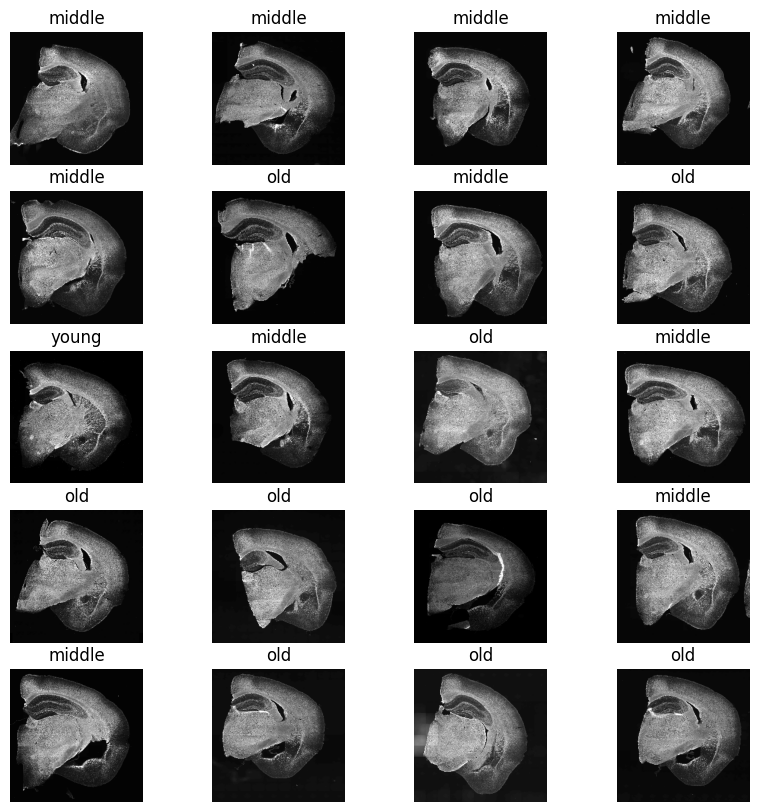

In [ ]:
# Let's visualize the data in our training batch
train_images, train_labels = next(train_data.as_numpy_iterator())
show_20_images(train_images, train_labels)

In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))>

In [ ]:
len(train_labels)


32

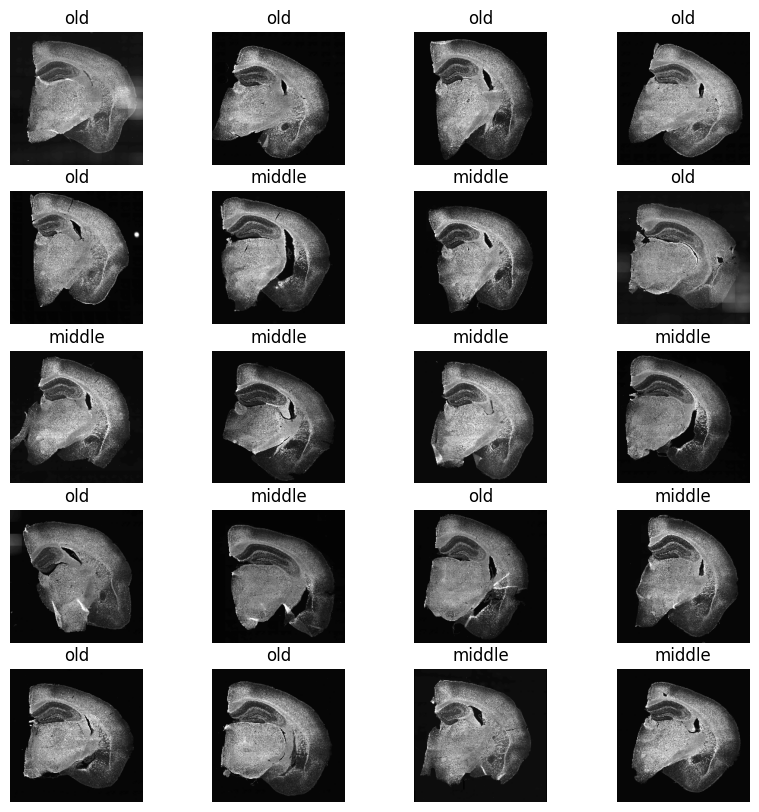

In [ ]:
# Now lets visualize the validation dataset
val_images, val_labels = next(val_data.as_numpy_iterator())
show_20_images(val_images, val_labels)

# 4. Modeling <a name='4'>
## Building a Model:

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, heigh, width, color channels

# Setup output shape
OUTPUT_SHAPE = len(unique_targets)

# Setup model URL from TensorFlow Hub
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

## Building Keras Model


In [ ]:
# Create a function which builds the Keras Model

def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):
  print('Building model with:', MODEL_URL)

  # setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input Layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation='softmax') # Layer 2 (output Layer)
      ])
  # compile the model:
  model.compile(
      loss = tf.keras.losses.CategoricalCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(),
      metrics = ['accuracy']
  )

  # build the model
  model.build(INPUT_SHAPE)

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 5435719 (20.74 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


## Creating Callbacks

### TensorBoard Callbacks

In [ ]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

# creates function to build a Tensorboard callback
def create_tensorboard_callback():
  # Create a log directory for storing Tensorboard log
  logdir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Brain Detection/log',
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
# create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_accuracy',
                                                  patience = 3)

## Training a Model (on a subset of our data)

In [ ]:
NUM_EPOCHS = 100 #@param {type:'slider', min:10, max:100, step: 1}

In [ ]:
# check to make sure we are running on a GPU

print('GPU', 'available' if tf.config.list_physical_devices('GPU') else 'not availablee')

GPU available


Let's Create the function which trains the model:

In [ ]:
# build a function to train and return a trained model
def train_model():
  '''
  Trains a given model and returns the trained version
  '''
  # create a model
  model = create_model()

  # create a new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # fit model to the data passing it the callbacks we created
  model.fit(x = train_data,
            epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  # return fitted model
  return model

In [ ]:
# fit model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
3/3 [==============================] - 83s 22s/step - loss: 1.3346 - accuracy: 0.4250 - val_loss: 1.0206 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 66s 22s/step - loss: 1.0720 - accuracy: 0.4750 - val_loss: 1.0734 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 73s 26s/step - loss: 0.9550 - accuracy: 0.5125 - val_loss: 1.0933 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 66s 22s/step - loss: 0.8037 - accuracy: 0.5875 - val_loss: 0.8838 - val_accuracy: 0.5500
Epoch 5/100
3/3 [==============================] - 64s 22s/step - loss: 0.6680 - accuracy: 0.6375 - val_loss: 0.7894 - val_accuracy: 0.5500
Epoch 6/100
3/3 [==============================] - 72s 26s/step - loss: 0.6087 - accuracy: 0.7000 - val_loss: 0.7412 - val_accuracy: 0.5500
Epoch 7/100
3/3 [==============================] - 72s 26s/step - l

### Checking the tensorboard logs



In [ ]:
# rm -rf ./logs/

In [ ]:
%tensorboard --logdir ./log

# 5. Making and evaluating predictions using trained model <a name='5'>

In [ ]:
# make predictions on the validation data
predictions = model.predict(val_data, verbose = 1 )
predictions

1/1 [==============================] - 13s 13s/step


array([[1.7565992e-02, 9.7697181e-01, 5.4621231e-03],
       [3.8995233e-01, 6.0861087e-01, 1.4368326e-03],
       [3.7680385e-01, 6.2205875e-01, 1.1373917e-03],
       [5.3249246e-01, 4.6371350e-01, 3.7940696e-03],
       [1.6847245e-01, 8.3092475e-01, 6.0282863e-04],
       [3.6533868e-01, 1.9310567e-01, 4.4155565e-01],
       [8.8162971e-01, 1.1717400e-01, 1.1961855e-03],
       [5.8722623e-02, 8.8584310e-01, 5.5434301e-02],
       [3.9036936e-01, 5.9694552e-01, 1.2685085e-02],
       [2.1727432e-01, 7.7837646e-01, 4.3492648e-03],
       [9.0459841e-01, 8.4552683e-02, 1.0848842e-02],
       [6.8721396e-01, 3.0493388e-01, 7.8522051e-03],
       [2.0966247e-01, 7.8372335e-01, 6.6141896e-03],
       [1.9109756e-01, 7.9788184e-01, 1.1020606e-02],
       [6.3498497e-01, 3.5348833e-01, 1.1526720e-02],
       [8.9960057e-01, 9.6964926e-02, 3.4344918e-03],
       [8.9615062e-02, 8.7451351e-01, 3.5871420e-02],
       [2.8934249e-01, 5.4169261e-01, 1.6896492e-01],
       [7.9462194e-01, 1.952

In [ ]:
predictions.shape

(20, 3)

In [ ]:
len(predictions[0])

3

In [ ]:
np.sum(predictions[0])

0.9999999

In [ ]:
# First prediction
index = 5
print(predictions[0])
print(f'Max value (probability of prediction): {np.max(predictions[0])}')
print(f'Sum: {np.sum(predictions[index])}')
print(f'Max index: {np.argmax(predictions[index])}')
print(f'Predicted Label: {unique_targets[np.argmax(predictions[index])]}')

[0.01756599 0.9769718  0.00546212]
Max value (probability of prediction): 0.9769718050956726
Sum: 1.0
Max index: 2
Predicted Label: young


In [ ]:
# turn prediction probabilities into their respective label
def get_pred_label(prediction_probabilities):
  '''
  Turn an array of prediction probabilities into a label.
  '''
  return unique_targets[np.argmax(prediction_probabilities)]

# get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[1])
pred_label

'old'

In [ ]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
  '''
  Turning our batched dataset of (image, labe) Tensors into a unbatched iterable
  '''
  images = []
  labels = []

  # loop through unbatched data
  for image, label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_targets[np.argmax(label)])

  return images, labels

# unbatchify the validation data
val_images, val_labels = unbatchify(val_data)
val_images[1], val_labels[1]

(array([[[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],
 
        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],
 
        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352941],
         ...,
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471],
         [0.01176471, 0.01176471, 0.01176471]],
 
        ...,
 
        [[0.02352941, 0.02352941, 0.02352941],
         [0.02352941, 0.02352941, 0.02352

In [ ]:
def plot_pred(prediction_probabilities, labels, images, n =1):
  '''
  View the prediction, ground truth, and image for sample n
  '''
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.axis('off')

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  # change plot title to be predicted, probability of prediction and truth label
  plt.title(f'Predicted Label: {pred_label} \n Predicted Probability {np.max(pred_prob)*100:2.0f}% \n True Label {true_label}',
            color = color)

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels = val_labels,
          images = val_images,
          n=15)

### Making a function to get the top 10 predictions

In [ ]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  '''
  Plot the top 10 prediction confidences along with the truth label for sample n.
  '''
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indices
  top10_pred_indices = pred_prob.argsort()[-10:][::-1]

  # Find the top 10 prediction confidence values
  top10_pred_values = pred_prob[top10_pred_indices]

  # Find the top 10 prediction labels
  top10_pred_labels = unique_targets[top10_pred_indices]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top10_pred_labels)),
                               top10_pred_values,
                               color = 'grey')
  plt.xticks(np.arange(len(top10_pred_labels)),
             labels = top10_pred_labels,
             rotation = 'vertical')
  # Change the color of true label
  if np.isin(true_label, top10_pred_labels):
    top_plot[np.argmax(top10_pred_labels == true_label)].set_color('green')
  else:
    pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels = val_labels,
               n = 19)

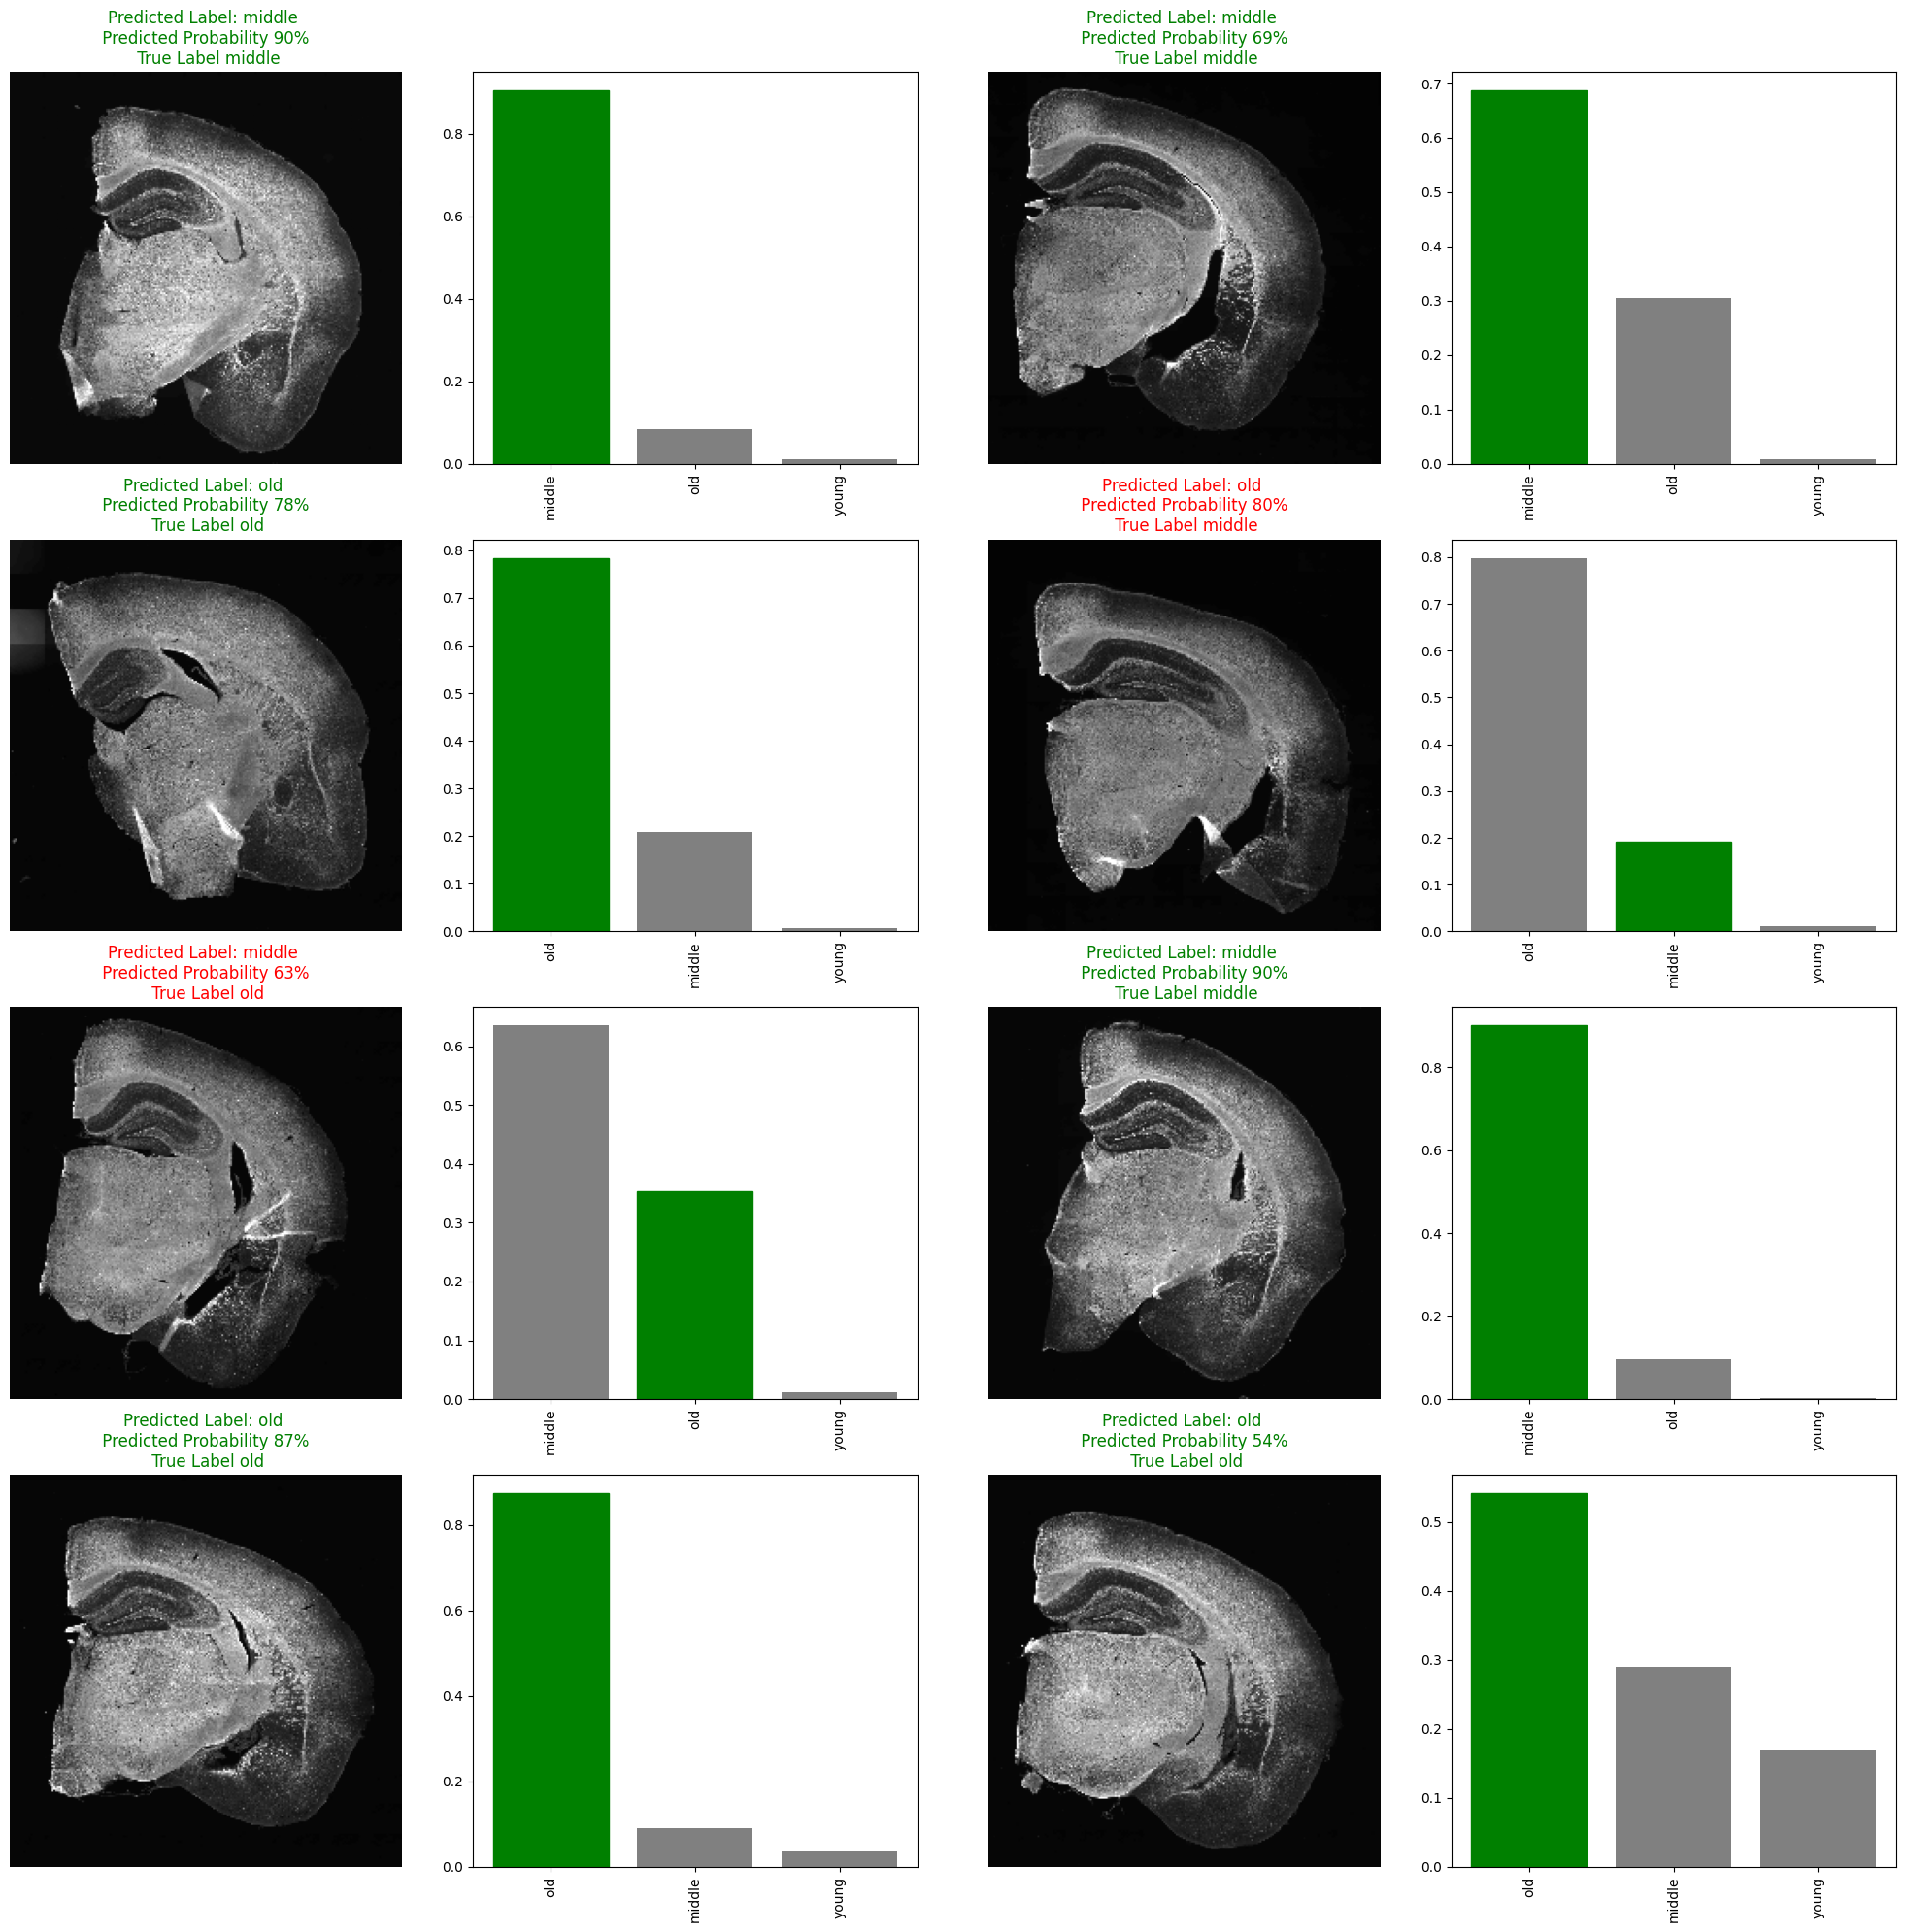

In [ ]:
# Let’s check our a few predictions and their different values
i_multiplier = 10
num_rows = 4
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize = (10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels = val_labels,
            images = val_images,
            n = i + i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels = val_labels,
                 n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

# 6. Saving and loading a Trained Model <a name='6'>

In [ ]:
# create a function to save a model
def save_model(model, suffix=None):
  '''
  Saves a given model in a 'models' directory and appends a suffix (string).
  '''
  # create a model directory pathname with current time
  modeldir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Brain Detection/models',
                          datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path = modeldir + '_' + suffix+'.h5' # save format of model
  print(f'saving model to: {model_path}')
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model:
def load_model(model_path):
  '''
  Load a saved model from a specified path.
  '''
  print(f'Loading saved model from {model_path}')
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {'KerasLayer':hub.KerasLayer})
  return model

Testing our saving/ loading function

In [ ]:
# Save our model trained on 1000 images
save_model(model, suffix = '1000-images-mobilenetv2-adam')

saving model to: /content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-213034_1000-images-mobilenetv2-adam.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


'/content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-213034_1000-images-mobilenetv2-adam.h5'

In [ ]:
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-213034_1000-images-mobilenetv2-adam.h5')

Loading saved model from /content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-213034_1000-images-mobilenetv2-adam.h5


In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

1/1 [==============================] - 14s 14s/step - loss: 0.5665 - accuracy: 0.6500


[0.5665329694747925, 0.6499999761581421]

In [ ]:
# Evaluate the loaded model
loaded_model.evaluate(val_data)

1/1 [==============================] - 14s 14s/step - loss: 0.5665 - accuracy: 0.6500


[0.5665329694747925, 0.6499999761581421]

## Training our model on the Full Training Dataset

In [ ]:
len(X), len(y)

(127, 127)

In [ ]:
len(X_train), len(y_train)

(80, 80)

In [ ]:
# Create a databatch with the full dataset:
full_data = create_data_batches(X, y)

Creating training data batches...


In [ ]:
full_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model:
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks
full_model_tensorboard = create_tensorboard_callback()

# No validation set when training on all the data, so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                             patience = 3)

Running the cell below will take a little while (maybe up to 30 minutes for the first epoch) beause the GPU we're using in the runtime has to load all he images into memory.

In [ ]:
print('GPU', 'Available' if tf.config.list_physical_devices('GPU') else 'Not Available')

GPU Available


In [ ]:
# fit the model with the full data
full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_tensorboard, full_model_early_stopping])

Epoch 1/100
4/4 [==============================] - 90s 20s/step - loss: 2.1582 - accuracy: 0.2362
Epoch 2/100
4/4 [==============================] - 80s 20s/step - loss: 1.7976 - accuracy: 0.3701
Epoch 3/100
4/4 [==============================] - 80s 20s/step - loss: 1.2755 - accuracy: 0.4488
Epoch 4/100
4/4 [==============================] - 81s 20s/step - loss: 1.0458 - accuracy: 0.4724
Epoch 5/100
4/4 [==============================] - 83s 21s/step - loss: 0.8303 - accuracy: 0.5906
Epoch 6/100
4/4 [==============================] - 86s 20s/step - loss: 0.6817 - accuracy: 0.7008
Epoch 7/100
4/4 [==============================] - 79s 20s/step - loss: 0.5964 - accuracy: 0.7559
Epoch 8/100
4/4 [==============================] - 80s 20s/step - loss: 0.5020 - accuracy: 0.7953
Epoch 9/100
4/4 [==============================] - 81s 20s/step - loss: 0.4429 - accuracy: 0.8583
Epoch 10/100
4/4 [==============================] - 80s 20s/step - loss: 0.3992 - accuracy: 0.8898
Epoch 11/100
4/4 [=

In [ ]:
save_model(full_model, suffix = 'full-model-mobilenetv2-adam')

saving model to: /content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-220937_full-model-mobilenetv2-adam.h5


'/content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-220937_full-model-mobilenetv2-adam.h5'

In [ ]:
%tensorboard --logdir /content/drive/MyDrive/Colab\ Notebooks/Brain\ Detection/log

In [ ]:
loaded_full_model = load_model('/content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-220937_full-model-mobilenetv2-adam.h5')

Loading saved model from /content/drive/MyDrive/Colab Notebooks/Brain Detection/models/20230922-220937_full-model-mobilenetv2-adam.h5


## Making Predictions on the Test Dataset

In [ ]:
# Load test iamge filenames:
test_path = '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/'
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_101.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_102.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_103.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_104.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_105.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_106.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_107.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_108.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_109.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_110.jpeg']

In [ ]:
len(test_filenames)

10

In [ ]:
# Create test data batch:
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches....


In [ ]:
test_data

<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**Notes** This next cell will take a bit of time

In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose = 1)

1/1 [==============================] - 11s 11s/step


In [ ]:
# Save predictions (NumPy array) to csv file(for access later)
np.savetxt('/content/drive/MyDrive/Colab Notebooks/Brain Detection/preds_array.csv',
           test_predictions,
           delimiter = ',')

In [ ]:
test_predictions = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Brain Detection/preds_array.csv',
                              delimiter = ',')

In [ ]:
test_predictions.shape


(10, 3)

In [ ]:
test_filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_101.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_102.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_103.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_104.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_105.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_106.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_107.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_108.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_109.jpeg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/test/image_110.jpeg']

### Making Predictions On Custom Images
---

These custom images are different from the test and training images because these three images are from different models of aging. Instead of natural aging, it is an example of inflammaging (using the model of experimental autoimmune encephalomyelitis and chemotherapy induced brain fog)



In [ ]:
# get custom image filepaths
custom_path = '/content/drive/MyDrive/Colab Notebooks/Brain Detection/custom'
custom_image_paths = [custom_path + '/' + fname for fname in os.listdir(custom_path)]

In [ ]:
custom_image_paths

['/content/drive/MyDrive/Colab Notebooks/Brain Detection/custom/EAE_brain_2.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/custom/EAE_brain_1.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Brain Detection/custom/cis_brain_1.jpg']

In [ ]:
# Turn custom images into batch datasets
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data

Creating test data batches....


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds

1/1 [==============================] - 4s 4s/step


array([[0.3198954 , 0.11080858, 0.56929606],
       [0.01854453, 0.7510778 , 0.23037772],
       [0.9816144 , 0.01154842, 0.00683714]], dtype=float32)

In [ ]:
custom_preds.shape

(3, 3)

In [ ]:
# get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['young', 'old', 'middle']

In [ ]:
# true labels for the images:
true_labels = ['Sham_control', 'EAE_sick', 'chemotherapy-induced_sickness']

In [ ]:
# Get custom images
custom_images = {}
# Loop through the unbatched data
for image, labels in zip(custom_data.unbatch().as_numpy_iterator(), true_labels):
  custom_images[labels] = image

In [ ]:
# check custom image predictions
plt.figure(figsize = (10,10))
for i, (label, image) in enumerate(custom_images.items()):
  plt.subplot(1, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title("Predicted Label: " + custom_pred_labels[i] + "\n" + "True Label: "+ label)
  plt.imshow(image)

In [ ]:
custom_images

{'Sham_control': array([[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],
 
        ...,
 
        [[0.        , 0.        , 0.        ],
         [0.        , 0. 

Here In the first trial of creating a ConvNet for image classication of young vs middle-aged vs old brain images, we achieved `>96%` accuracy.

Testing custom images we see that the unsick healthy mice were categorized as `young` while the sick mice were categorized as `old` and the model with a less neurodegenerative phenotype was given the `middle` label.